In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.5+ KB


In [5]:
df.drop(['Email', 'Address'], axis=1, inplace=True)

In [6]:
df

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...
495,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [7]:
df['Avatar'].nunique()

138

In [8]:
df.drop('Avatar', axis=1, inplace=True )

In [9]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


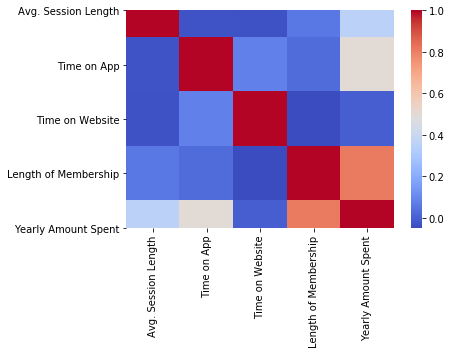

In [11]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [12]:
df.drop('Time on Website', axis=1, inplace=True)

In [13]:
df.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


In [14]:
x=df.drop('Yearly Amount Spent', axis=1)
y=df['Yearly Amount Spent']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [17]:
x_train.shape

(350, 3)

In [18]:
y_train.shape

(350,)

In [19]:
x_test.shape

(150, 3)

In [20]:
y_train.shape

(350,)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()

In [23]:
model.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
ypred=model.predict(x_test)

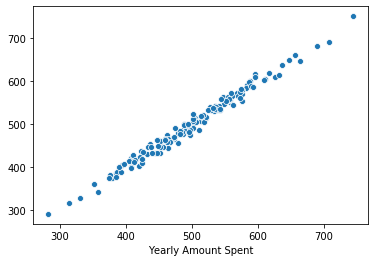

In [25]:
sns.scatterplot(y_test,ypred)

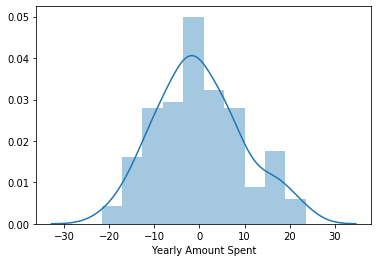

In [26]:
sns.distplot(y_test-ypred)

In [47]:
abs(y_test-ypred).mean()

7.671226929103184

In [42]:
data={'Y_test': y_test, 'Ypred': ypred, 'Difference':y_test-ypred}

In [44]:
da=pd.DataFrame(data)

In [45]:
da

,Y_test,Ypred,Difference
459,407.876378,420.975198,-13.098820
372,385.152338,386.431493,-1.279155
109,549.008227,547.596785,1.411442
251,393.857371,403.982971,-10.125600
248,448.340425,462.662247,-14.321822
...,...,...,...
404,488.270298,497.822292,-9.551994
347,593.156401,587.110382,6.046019
44,448.229829,448.312835,-0.083006
110,459.285123,462.334820,-3.049696
